## Importing Packages

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

## Importing Packages

In [ ]:
df = pd.read_csv("covid_19_data.csv")
df.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


Data Analysis

In [ ]:
df1 = df[['ObservationDate', 'Confirmed', 'Deaths', 'Recovered']]

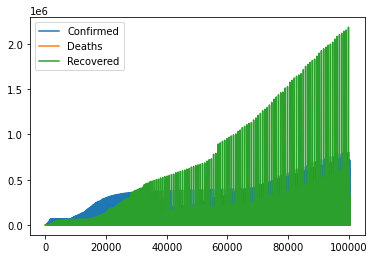

In [ ]:
df1.plot()

In [ ]:
## prepare the Column names for the columns
df_confirmed = df1[['ObservationDate',  'Confirmed']]
df_confirmed.columns = ['ds', 'y']

df_deaths = df1[['ObservationDate',  'Deaths']]
df_deaths.columns = ['ds', 'y']

df_recovered = df1[['ObservationDate',  'Recovered']]
df_recovered.columns = ['ds', 'y']

In [ ]:
df_confirmed.head()

,ds,y
0,01/22/2020,1.0
1,01/22/2020,14.0
2,01/22/2020,6.0
3,01/22/2020,1.0
4,01/22/2020,0.0


In [ ]:
df_deaths.head()

,ds,y
0,01/22/2020,0.0
1,01/22/2020,0.0
2,01/22/2020,0.0
3,01/22/2020,0.0
4,01/22/2020,0.0


In [ ]:
df_recovered.head()

,ds,y
0,01/22/2020,0.0
1,01/22/2020,0.0
2,01/22/2020,0.0
3,01/22/2020,0.0
4,01/22/2020,0.0


In [ ]:
df_confirmed['ds'] = pd.to_datetime(df_confirmed['ds'])
df_deaths['ds'] = pd.to_datetime(df_deaths['ds'])
df_recovered['ds'] = pd.to_datetime(df_recovered['ds'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [ ]:
df_confirmed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100344 entries, 0 to 100343
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   ds      100344 non-null  datetime64[ns]
 1   y       100343 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 1.5 MB


In [ ]:
df_deaths.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100344 entries, 0 to 100343
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   ds      100344 non-null  datetime64[ns]
 1   y       100343 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 1.5 MB


In [ ]:
df_recovered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100344 entries, 0 to 100343
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   ds      100344 non-null  datetime64[ns]
 1   y       100343 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 1.5 MB


## Modelling

In [ ]:
## importing fbprophet model
from fbprophet import Prophet

In [ ]:
model_confirmed = Prophet()
model_deaths = Prophet()
model_recovered = Prophet()

In [ ]:
model_confirmed.fit(df_confirmed)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
model_deaths.fit(df_deaths)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
model_recovered.fit(df_recovered)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


## Future Prediction

In [ ]:
future = list()
for i in range(1, 10):
  date = '2020-%10d' %i
  future.append([date])
future = pd.DataFrame(future)
future.columns = ['ds']
future['ds'] = pd.to_datetime(future['ds'])

In [ ]:
f_confirmed = model_confirmed.predict(future)

In [ ]:
f_confirmed

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-01,16.545602,-57143.338788,62482.815305,16.545602,16.545602,-8.089668,-8.089668,-8.089668,-8.089668,-8.089668,-8.089668,0.0,0.0,0.0,8.455934
1,2020-02-01,289.283776,-54950.094355,62635.927451,289.283776,289.283776,15.090863,15.090863,15.090863,15.090863,15.090863,15.090863,0.0,0.0,0.0,304.374639
2,2020-03-01,544.425938,-64666.554343,61392.123771,544.425938,544.425938,39.746213,39.746213,39.746213,39.746213,39.746213,39.746213,0.0,0.0,0.0,584.172151
3,2020-04-01,3026.501270,-58976.834104,65688.166292,3026.501270,3026.501270,-8.089668,-8.089668,-8.089668,-8.089668,-8.089668,-8.089668,0.0,0.0,0.0,3018.411602
4,2020-05-01,10424.704651,-52515.148650,71517.722497,10424.704651,10424.704651,-28.151212,-28.151212,-28.151212,-28.151212,-28.151212,-28.151212,0.0,0.0,0.0,10396.553438
5,2020-06-01,10635.511076,-53143.473001,72546.585164,10635.511076,10635.511076,-27.658076,-27.658076,-27.658076,-27.658076,-27.658076,-27.658076,0.0,0.0,0.0,10607.853000
6,2020-07-01,14684.570279,-41001.021080,77292.484246,14684.570279,14684.570279,-8.089668,-8.089668,-8.089668,-8.089668,-8.089668,-8.089668,0.0,0.0,0.0,14676.480611
7,2020-08-01,23957.421191,-38271.080060,84298.918468,23957.421191,23957.421191,15.090863,15.090863,15.090863,15.090863,15.090863,15.090863,0.0,0.0,0.0,23972.512055
8,2020-09-01,34702.171241,-25012.249187,91022.989377,34702.171241,34702.171241,77.954887,77.954887,77.954887,77.954887,77.954887,77.954887,0.0,0.0,0.0,34780.126127


In [ ]:
f_deaths= model_deaths.predict(future)

In [ ]:
f_deaths

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-01,9.816898,-3474.624572,3368.167120,9.816898,9.816898,0.855794,0.855794,0.855794,0.855794,0.855794,0.855794,0.0,0.0,0.0,10.672692
1,2020-02-01,10.588719,-3279.529437,3491.943548,10.588719,10.588719,1.716674,1.716674,1.716674,1.716674,1.716674,1.716674,0.0,0.0,0.0,12.305394
2,2020-03-01,11.310746,-3420.818377,3397.156062,11.310746,11.310746,2.616734,2.616734,2.616734,2.616734,2.616734,2.616734,0.0,0.0,0.0,13.927479
3,2020-04-01,169.568543,-3550.017338,3656.689184,169.568543,169.568543,0.855794,0.855794,0.855794,0.855794,0.855794,0.855794,0.0,0.0,0.0,170.424337
4,2020-05-01,733.019948,-2908.866224,4308.990962,733.019948,733.019948,-0.631082,-0.631082,-0.631082,-0.631082,-0.631082,-0.631082,0.0,0.0,0.0,732.388866
5,2020-06-01,644.961529,-2668.002188,4041.691539,644.961529,644.961529,-1.797220,-1.797220,-1.797220,-1.797220,-1.797220,-1.797220,0.0,0.0,0.0,643.164310
6,2020-07-01,702.074669,-2852.932980,4185.551065,702.074669,702.074669,0.855794,0.855794,0.855794,0.855794,0.855794,0.855794,0.0,0.0,0.0,702.930463
7,2020-08-01,922.000078,-2440.678563,4386.641178,922.000078,922.000078,1.716674,1.716674,1.716674,1.716674,1.716674,1.716674,0.0,0.0,0.0,923.716752
8,2020-09-01,1151.416271,-2402.270754,4436.427722,1151.416271,1151.416271,0.451811,0.451811,0.451811,0.451811,0.451811,0.451811,0.0,0.0,0.0,1151.868082


In [ ]:
f_recovered = model_recovered.predict(future)

In [ ]:
f_recovered

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-01,188.346436,-64741.399343,59178.714160,188.346436,188.346436,8.529939,8.529939,8.529939,8.529939,8.529939,8.529939,0.0,0.0,0.0,196.876375
1,2020-02-01,153.270120,-60886.988771,60615.207712,153.270120,153.270120,7.643454,7.643454,7.643454,7.643454,7.643454,7.643454,0.0,0.0,0.0,160.913573
2,2020-03-01,120.456792,-59700.508319,59123.931325,120.456792,120.456792,1.989431,1.989431,1.989431,1.989431,1.989431,1.989431,0.0,0.0,0.0,122.446223
3,2020-04-01,696.220217,-55695.004601,65181.110106,696.220217,696.220217,8.529939,8.529939,8.529939,8.529939,8.529939,8.529939,0.0,0.0,0.0,704.750156
4,2020-05-01,3236.144361,-57388.319823,61867.599833,3236.144361,3236.144361,-10.649049,-10.649049,-10.649049,-10.649049,-10.649049,-10.649049,0.0,0.0,0.0,3225.495312
5,2020-06-01,4610.611632,-60259.152873,66430.417855,4610.611632,4610.611632,-21.518048,-21.518048,-21.518048,-21.518048,-21.518048,-21.518048,0.0,0.0,0.0,4589.093584
6,2020-07-01,7601.177525,-51742.584372,69355.110873,7601.177525,7601.177525,8.529939,8.529939,8.529939,8.529939,8.529939,8.529939,0.0,0.0,0.0,7609.707464
7,2020-08-01,14163.211406,-43435.940801,75097.595998,14163.211406,14163.211406,7.643454,7.643454,7.643454,7.643454,7.643454,7.643454,0.0,0.0,0.0,14170.854860
8,2020-09-01,22893.746655,-40059.243790,87210.533963,22893.746655,22893.746655,39.026185,39.026185,39.026185,39.026185,39.026185,39.026185,0.0,0.0,0.0,22932.772840


## Model Plotting

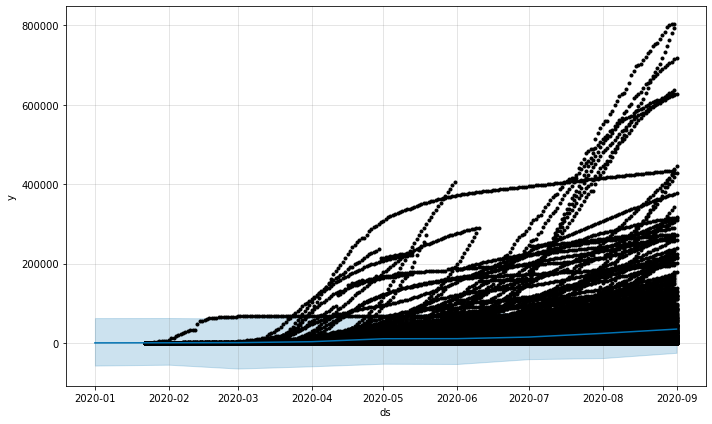

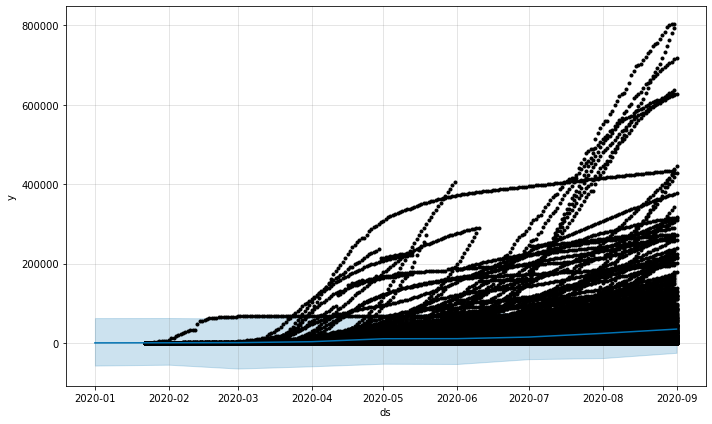

In [ ]:
model_confirmed.plot(f_confirmed)

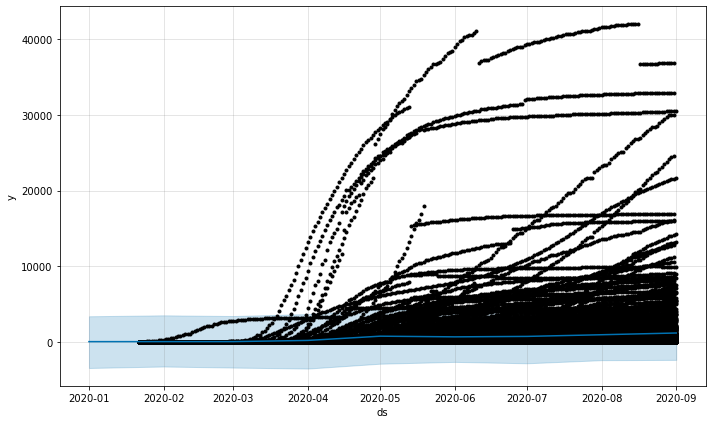

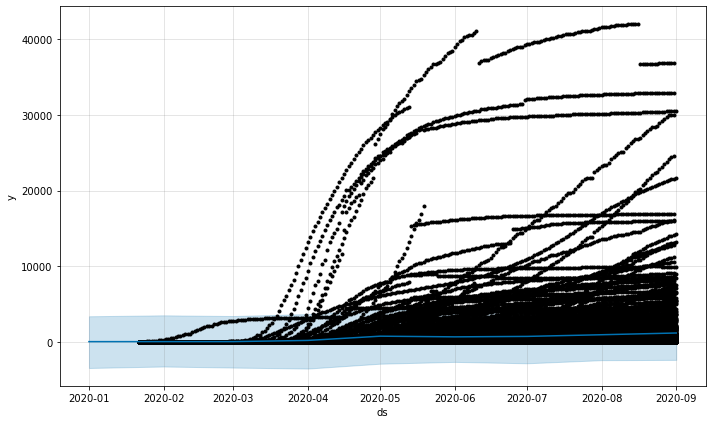

In [ ]:
model_deaths.plot(f_deaths)

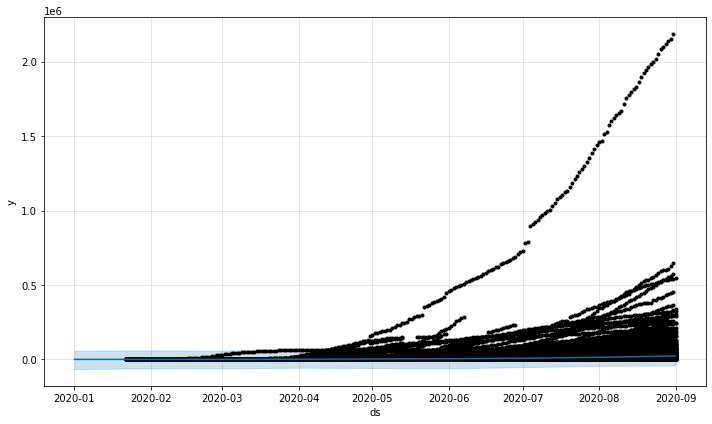

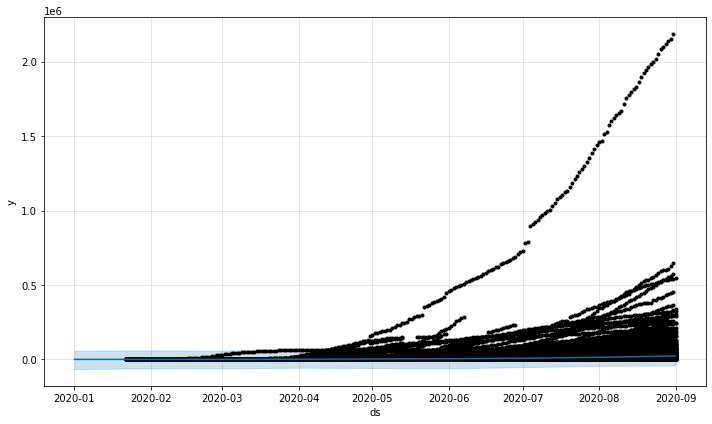

In [ ]:
model_recovered.plot(f_recovered)

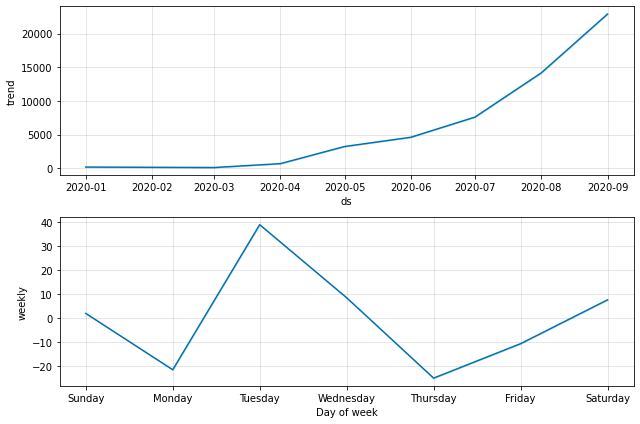

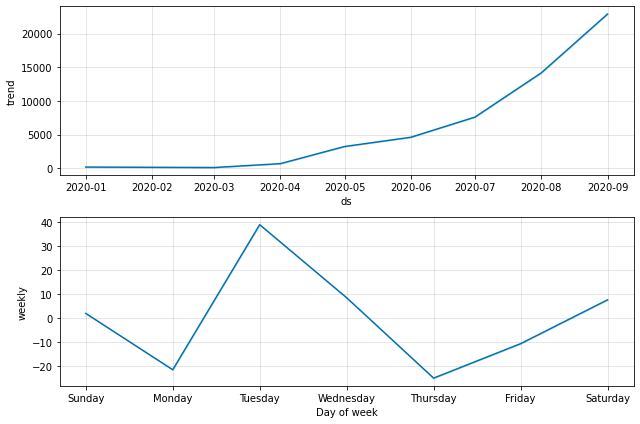

In [ ]:
model_recovered.plot_components(f_recovered)

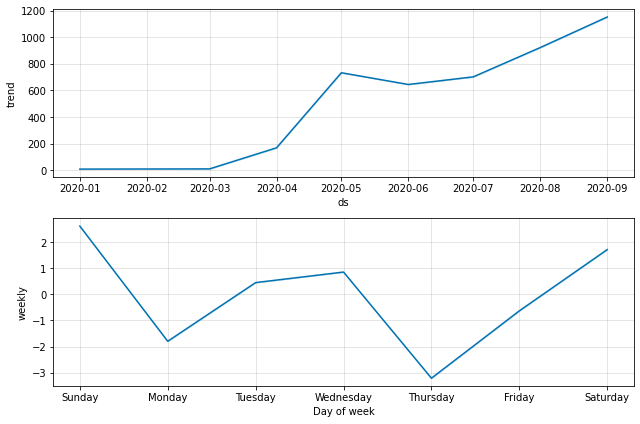

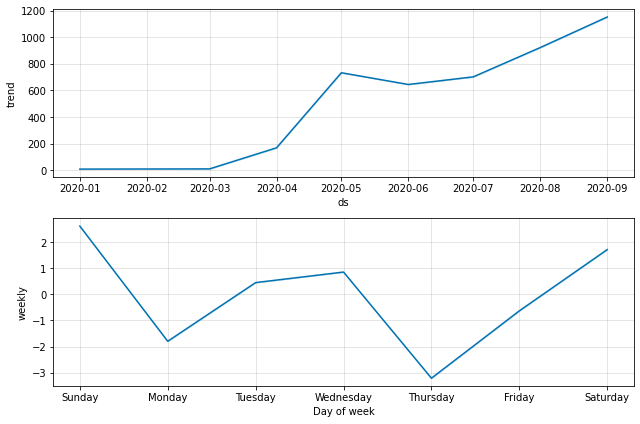

In [ ]:
model_deaths.plot_components(f_deaths)

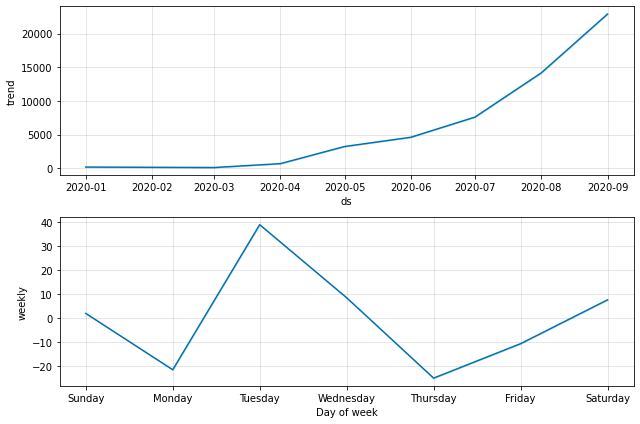

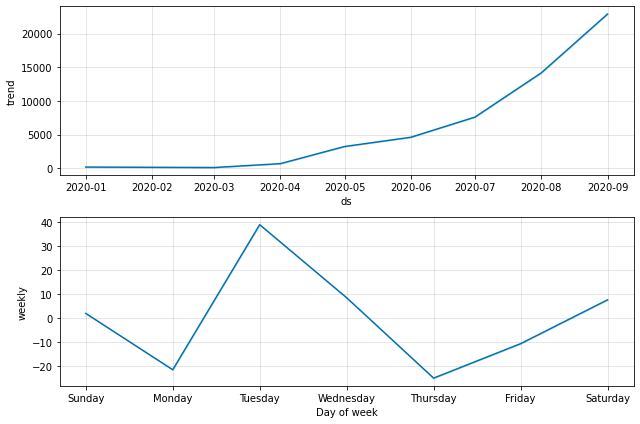

In [ ]:
model_recovered.plot_components(f_recovered)